In [1]:
import wandb
#wandb.login()

Entity: your user name (e.g. aymeric-mcrae)

Project: project title

Y_values: the quantity to plot on y-axis (check spelling, must be same as in project e.g. "Val. Accuracy")

hyper_dicts: list of dictionnaries, holding config hyperparameters for chosen curves

In [20]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

def plotWandBCurves(entity, project, hyper_dicts, y_values="Validation Loss", save_path = ".", save_csv = True, save_png=True):
    
    api = wandb.Api()
    runs = api.runs(entity + "/" + project)
    history = []
    for run in runs:
        config = run.config
        model = config['model']
        if any(d.items() <= config.items() for d in hyper_dicts):
            for row in run.scan_history():
                try:
                    history.append([row['_step'], row[y_values], config['optim'], config['seed']])
                except KeyError:
                    pass
      
    df = pd.DataFrame(history, columns=['epoch', y_values, 'optim', 'seed'])
    df['epoch'] = np.floor(df['epoch']/min(df['epoch']))
    
    name = project + "-" + model
    for entry in hyper_dicts:
        name += ("-" + entry['optim'])
    name += "-" + y_values
        
        
    path = os.path.join(save_path, name+".csv")
    
    if save_csv:
        df.to_csv(path_or_buf = path, index=False)

    sns.set_style('whitegrid') 

    known_optims = ['SGD', 'SGD_C', 'SGDM', 'SGDM_C', 'RMSprop', 'RMSprop_C', 'Adam', 'Adam_C']
    colors = sns.color_palette("colorblind", len(known_optims))
    palette = {}
    for i in range(0, len(known_optims)):
      palette[known_optims[i]] = colors[i]

    sns.lineplot(x = 'epoch', y = y_values, hue = 'optim', data = df, palette = palette)
    plt.legend(bbox_to_anchor=(0.75, 1), loc=2, borderaxespad=0.)
    if save_png:
        plt.savefig(name + '.png')
    plt.show()
    
    return df

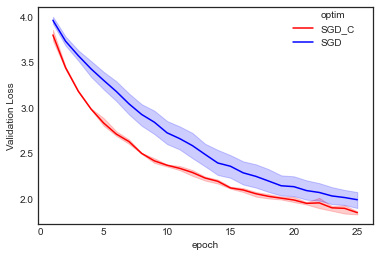

In [21]:
hyper_dicts = [
    {'model': 'convnet', 'optim': 'SGD_C', 'lr': 0.001, 'aggr': 'sum', 'decay': 0.9, 'topC': 20},
    {'model': 'convnet', 'optim': 'SGD', 'lr': 0.01, 'aggr': 'none', 'decay': 0, 'topC': 0}
]

a = plotWandBCurves(entity='aymeric-mcrae', project='critical-gradients-cifar100', hyper_dicts=hyper_dicts, y_values="Validation Loss")

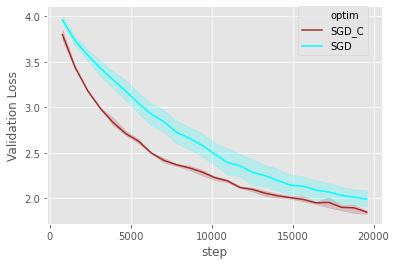

In [155]:
palette = {'SGD': 'blue',
       'SGD_C': 'red',
       'SGDM': 'green',
       'SGDM_C': 'orange',
       'RMSprop': 'purple',
       'RMSprop_C': 'brown',
       'Adam': 'black',
       'Adam_C': 'magenta'
      }

sns.lineplot(x = 'step', y = 'Validation Loss', hue = 'optim',data = a, palette = {'SGD': 'cyan', 'SGD_C': 'brown'})
plt.legend(bbox_to_anchor=(0.75, 1), loc=2, borderaxespad=0.)
plt.style.use('fivethirtyeight')
plt.show()

In [13]:
import numpy as np
a['epoch'] = np.floor(a['epoch']/min(np.float(a['epoch'])))

TypeError: cannot convert the series to <class 'float'>

In [166]:
a['step']

0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
       ... 
320    21.0
321    22.0
322    23.0
323    24.0
324    25.0
Name: step, Length: 325, dtype: float64

In [26]:
known_optims = ['SGD', 'SGD_C', 'SGDM', 'SGDM_C', 'RMSprop', 'RMSprop_C', 'Adam', 'Adam_C']
colors = sns.color_palette("colorblind", len(known_optims))
palette = {}
for i in range(0, len(known_optims)):
    palette[known_optims[i]] = colors[i]
    
print(palette)

{'SGD': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 'SGD_C': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), 'SGDM': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), 'SGDM_C': (0.8352941176470589, 0.3686274509803922, 0.0), 'RMSprop': (0.8, 0.47058823529411764, 0.7372549019607844), 'RMSprop_C': (0.792156862745098, 0.5686274509803921, 0.3803921568627451), 'Adam': (0.984313725490196, 0.6862745098039216, 0.8941176470588236), 'Adam_C': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)}
